<a href="https://colab.research.google.com/github/Katetuna/innopolis/blob/main/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Контекст задачи:**
Косметологическая компания проводит тестирование усовершенствованной формулы средства для лица по лечению акне. Тестирование проводилось среди двух контрольных групп(ad_id) (контрольная(А) - со старой формулой и тестовая(В) - с новой формулой), которые отмечали(action) есть ли положительный эффект (1) или нет (0). Доказанная эффективность первоначальной формулы 20%, желаемый результат по приенению новой формулы  - повышение эффективности до 50%

Загрузка датафрейма и проверка содержимого:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
df = pd.read_csv('ad.csv')
df.head()


,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1



**Таким образом:** Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

Проверка распределения значений, действительно ли результаты группы В лучше

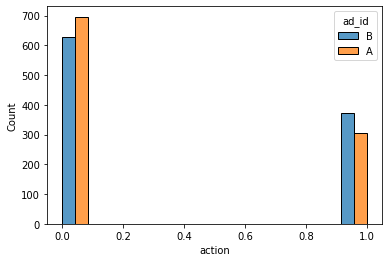

In [4]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

Распределение данных дискретное, которое принимает на вход только два значения: 0 и 1. Кол-во 1 в группе B выше, чем в группе А.
В свзяи с этим необходима проверка, не случайна ли данная разница в значениях.

**Формулировка гипотезы:**

H0: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают положительный эффект старой и новой формулы соотвественно. 

95% - уровень доверия

5% -  порог ошибки первого рода ( α = 0,05)

В результате решения данной задачи, мы хотим быть на 95% уверены, что эффективность новой формулы статистически отличается от эффективности прежней формулы, прежде чем отклонить нулевую гипотезу H0.

**Проверка гипотезы:**
В связи с тем,что распределение дискретное и разброс значений мал, проверку гипотезы будем проводить оценку с помощью Z-теста (z-критерий Фишера).

In [7]:
#порог ошибки первого рода
alpha = 0.05
#Импорт библиотеки для расчета Z статистики
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

#Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

#Считаем кол-во эффективных результатов в каждой группе
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

#Итоги проверки гипотезы:
if pval<alpha:
  print("результат эксперимента можно считать статзначимым, Н0 гипотеза отклонена")
else:
  print("разница в значениях тестовой и контрольной группы случайна, Н0 гипотезу отклонять нельзя")

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403
результат эксперимента можно считать статзначимым, Н0 гипотеза отклонена


**Проверка** доверительных интервалов (повысилась ли эффективность до желаемого уровня?):

In [12]:
#ожидаемый уровень эффективности:
level_B = 0.5
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)
if upper_test < level_B:
  print("Эффективность не достигла желаемого уровня")
else:
  print('Уровень эффективности соответствует ожиданиям')

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371
Эффективность не достигла желаемого уровня
